<a href="https://colab.research.google.com/github/hongkwangpyo/2020_dip_learning/blob/master/0807_3_keras_DNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from collections import Counter

from sklearn.preprocessing import *

In [6]:
from google.colab import files
uploaded = files.upload()

Saving adult.txt to adult (1).txt


In [12]:
df = pd.read_csv('adult (1).txt', index_col=False, header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [13]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', '50k']
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


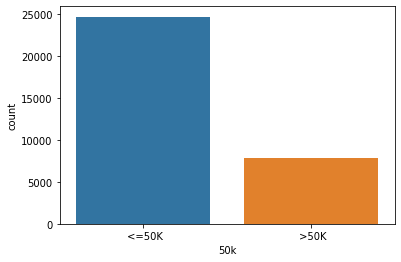

In [14]:
sns.countplot('50k', data=df)

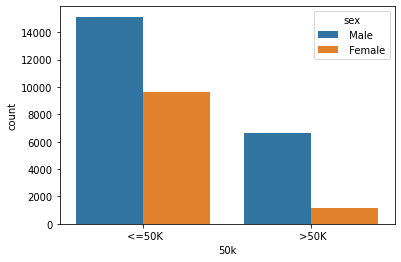

In [15]:
sns.countplot('50k', data=df, hue='sex')

In [31]:
def kturn(k):
  if k == ' >50K':
    return 1
  else:
    return 0
df['50knum'] = df['50k'].apply(kturn)

In [38]:
x = df.drop(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', '50k', '50knum'], axis=1)

In [39]:
x = pd.get_dummies(x, drop_first=True)

In [40]:
y = df['50knum']

In [41]:
y1 = to_categorical(y)

In [42]:
X = pd.concat([x, df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]], axis=1)

In [43]:
scaler = MinMaxScaler()
X[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = \
scaler.fit_transform(X[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])
X.head(2)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,...,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.301370,0.044302,0.8,0.02174,0.0,0.397959
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.452055,0.048238,0.8,0.00000,0.0,0.122449


In [53]:
x_train = X[:25000]
x_test = X[25000:]
y_train = y1[:25000]
y_test = y1[25000:]

print(x_train.shape)
print(x_test.shape)

(25000, 100)
(7561, 100)


In [56]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              103424    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 694,146
Trainable params: 694,146
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

In [ ]:
hist.history['loss']

In [ ]:
hist.history['accuracy']

In [ ]:
hist.history['val_loss']

In [ ]:
hist.history['val_accuracy']

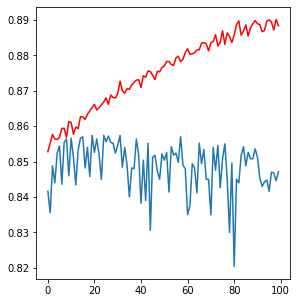

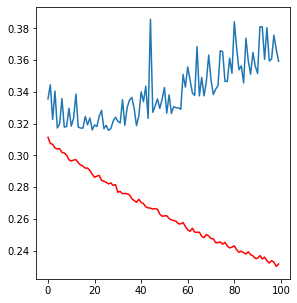

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color='r') # train data => 과적합중
plt.plot(hist.history['val_accuracy']) # test data => 비슷
plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r') 
plt.plot(hist.history['val_loss']) 

In [70]:
preds = model.predict(x_test)
preds[:10]

array([[9.19826090e-01, 8.01738575e-02],
       [9.99386430e-01, 6.13581273e-04],
       [9.99523163e-01, 4.76860325e-04],
       [6.19012296e-01, 3.80987674e-01],
       [9.99892592e-01, 1.07345055e-04],
       [9.99998450e-01, 1.50615551e-06],
       [7.64377654e-01, 2.35622406e-01],
       [9.06595230e-01, 9.34047028e-02],
       [9.39558327e-01, 6.04416803e-02],
       [9.99849916e-01, 1.50008520e-04]], dtype=float32)

In [77]:
np.mean(preds.argmax(axis=1) == y_test.argmax(axis=1))

0.8438037296653882